In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn.datasets

In [5]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.linear_model import LogisticRegression 

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [12]:
import xgboost as xgb

In [13]:
import seaborn as sns

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
import pickle

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()

In [18]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [19]:
df=pd.DataFrame(data=breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)

In [20]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df['label']=breast_cancer_dataset.target

In [22]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [23]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [25]:
df.shape

(569, 31)

In [26]:
#checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [27]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [28]:
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

# 1 = Benign (less risky)
# 0 = Maligant (more risky)

In [29]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Observations:
1. Mean of Maligant type is more as comapre to Benign type

In [30]:
X=df.drop('label',axis=1)

In [31]:
y=df['label']

In [32]:
sc=StandardScaler()


In [33]:
X=sc.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# RandomForestClassifier

In [35]:
rfc=RandomForestClassifier()


In [36]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

# Accuracy score of testing data

In [37]:
y_pred=rfc.predict(X_test)


In [38]:
accuracy_score(y_test,y_pred)

0.9649122807017544

# Accuracy score of training data 

In [39]:
y_pred=rfc.predict(X_train)


In [40]:
accuracy_score(y_train,y_pred)

1.0

# DecisionTreeClassifier

In [41]:
dtc=DecisionTreeClassifier()

In [42]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

# Accuracy score of testing data

In [43]:
y_pred=dtc.predict(X_test)


In [44]:
accuracy_score(y_test,y_pred)

0.9298245614035088

# Accuracy score of training data 

In [45]:
y_pred=dtc.predict(X_train)


In [46]:
accuracy_score(y_train,y_pred)

1.0

# LogisticRegression

In [47]:
lr=LogisticRegression()

In [48]:
lr.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred=lr.predict(X_test)


# Accuracy score of testing data

In [50]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [51]:
y_pred=lr.predict(X_train)


# Accuracy score of training data 

In [52]:
accuracy_score(y_train,y_pred)

0.9868131868131869

In [53]:
kf=KFold(5)


In [54]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [55]:
scores=cross_val_score(lr,X,y,cv=kf)

In [56]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)
    

1 0.9736842105263158
2 0.956140350877193
3 0.9824561403508771
4 0.9824561403508771
5 0.9911504424778761


In [57]:
average_score=scores.mean()

In [58]:
average_score

0.9771774569166279

# KNeighborsClassifier

In [59]:
knc=KNeighborsClassifier()


In [60]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

# Accuracy score of testing data

In [61]:
y_pred=knc.predict(X_test)


In [62]:
accuracy_score(y_test,y_pred)

0.9473684210526315

# Accuracy score of training data 

In [63]:
y_pred=knc.predict(X_train)


In [64]:
accuracy_score(y_train,y_pred)

0.9802197802197802

In [65]:
kf=KFold(5)

In [66]:
scores=cross_val_score(knc,X,y,cv=kf)

In [67]:
scores

array([0.92982456, 0.95614035, 0.96491228, 0.98245614, 0.96460177])

In [68]:
for fold_idx,value in enumerate(scores):
    print(fold_idx,value)

0 0.9298245614035088
1 0.956140350877193
2 0.9649122807017544
3 0.9824561403508771
4 0.9646017699115044


In [69]:
avg_score=scores.mean()

In [70]:
avg_score

0.9595870206489675

In [71]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Building the Neural Network

In [72]:
#importing libraries 

In [73]:
import tensorflow as tf
#tensorflow is develop by google
#we can build Neural network using tensorflow

In [74]:
tf.random.set_seed(3)

In [75]:
from tensorflow import keras

In [76]:
#setting up the layers for NN

In [77]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(30,)),
                       keras.layers.Dense(20,activation='relu'),
                       keras.layers.Dense(2,activation='sigmoid')])

In [78]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [79]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=10)


Epoch 1/10
13/13 [==============================] - 1s 31ms/step - loss: 0.7782 - accuracy: 0.5501 - val_loss: 0.5091 - val_accuracy: 0.8478
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5204 - accuracy: 0.8093 - val_loss: 0.3474 - val_accuracy: 0.9348
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3798 - accuracy: 0.8998 - val_loss: 0.2573 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2974 - accuracy: 0.9193 - val_loss: 0.2099 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2504 - accuracy: 0.9364 - val_loss: 0.1797 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2186 - accuracy: 0.9462 - val_loss: 0.1603 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1944 - accuracy: 0.9535 - val_loss: 0.1468 - val_accuracy: 1.0000
Epoch 8/10
13/13 [=

# Visualizing accuracy and Loss

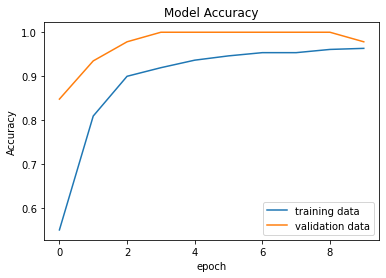

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(['training data','validation data'],loc="lower right")

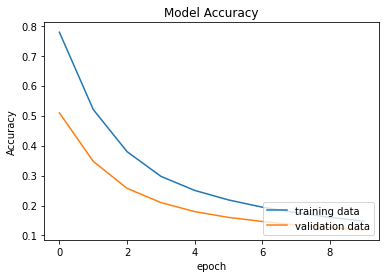

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(['training data','validation data'],loc="lower right")

# Accuracy of Model on Test Data

In [82]:
loss,accuracy=model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1226 - accuracy: 0.9561


In [83]:
X_test.shape

(114, 30)

In [84]:
y_pred=model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [85]:
print(y_pred.shape)

(114, 2)


In [86]:
print(y_pred[0])

[0.30715215 0.6375676 ]


In [87]:
#output in the form of probability 0 and 1
y_pred[0]
#we will select output as 1 beacuse its probavility is high

array([0.30715215, 0.6375676 ], dtype=float32)

In [88]:
y_pred
#some confidence value of model and sum is not equal to 1

array([[3.07152152e-01, 6.37567580e-01],
       [7.31420100e-01, 1.15104109e-01],
       [5.35450339e-01, 1.54710829e-01],
       [9.77280214e-02, 7.36782253e-01],
       [6.15697913e-02, 7.55126297e-01],
       [8.43717813e-01, 1.04921963e-03],
       [8.41121078e-01, 8.88434146e-03],
       [6.00947917e-01, 4.12839144e-01],
       [3.76093805e-01, 3.50401074e-01],
       [2.05583945e-01, 9.03756678e-01],
       [2.19721898e-01, 6.67267919e-01],
       [6.34673297e-01, 3.39361012e-01],
       [3.90944868e-01, 8.41859281e-01],
       [7.41949439e-01, 3.22786510e-01],
       [2.25306258e-01, 8.66782069e-01],
       [5.92734754e-01, 3.92131209e-02],
       [2.80654103e-01, 8.49020779e-01],
       [2.33210903e-02, 8.95991266e-01],
       [6.10007718e-03, 9.64839816e-01],
       [7.68160760e-01, 3.97470221e-02],
       [3.65872294e-01, 4.80715930e-01],
       [1.64989680e-01, 7.25911975e-01],
       [7.74664164e-01, 4.66418872e-03],
       [6.68961704e-02, 8.95741463e-01],
       [1.175937

In [89]:
X_test

array([[-0.47069438, -0.16048584, -0.44810956, ..., -0.19956318,
         0.18320441,  0.19695794],
       [ 1.36687747,  0.47014935,  1.30288585, ...,  0.97897545,
        -0.56582801, -1.00057787],
       [ 0.37850807,  0.04429607,  0.40082046, ...,  0.56024403,
        -0.10314275, -0.20813168],
       ...,
       [-0.74050787, -1.01451947, -0.74550281, ..., -0.28209134,
        -0.3830188 , -0.3245049 ],
       [ 0.02633046,  1.99205126,  0.02393013, ..., -0.49358878,
        -1.63518099, -0.33170895],
       [ 1.87526288,  2.75300221,  1.80128727, ...,  0.78102969,
        -0.05299156, -0.0978542 ]])

# Converting the prediction probability to class label

In [90]:
lis=[10,20,30]
index_max_value=np.argmax(lis)
print(index_max_value)

2


In [91]:
y_pred_label=[np.argmax(i) for i in y_pred]

In [92]:
y_pred_label

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0]